Data preprocessing :

Two data source will be imported
"AIS_weather_h_rename_copy.csv" will be used to replace the information for true current direction and true wind direction

In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import math

df = pd.read_csv("AIS_weather_H_ok2_copy.csv")
df = df[df['LAT'] > 55.04 ]

dfship_pre = pd.read_csv("AIS_weather_h_rename_copy.csv")
dfship_pre2 = dfship_pre[dfship_pre['LAT'] > 55.04 ]

#pd.reset_option("all")


In [2]:
dfship_pre3 = dfship_pre2.drop(dfship_pre2.columns[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,22,23,26]],axis=1)
dfship_pre3 = dfship_pre3.rename({'Eastward wind': 'eastwind', 'Northward wind': 'northwind',
                           'Eastward current': 'eastcurrent', 'Northward current': 'northcurrent',
                           'SOG':'sog','COG':'cog','Heading':'heading'},axis=1) 
dfship_pre3.head(n=5)

,eastwind,northwind,eastcurrent,northcurrent,sog,cog
0,2.267688,6.741482,0.113690,0.044994,0.0,358.9
1,1.782681,6.410275,0.113690,0.044994,0.0,358.9
2,1.154659,6.385135,0.083984,0.054000,0.0,358.9
3,0.348801,6.094659,0.083984,0.054000,0.0,358.9
4,-0.593128,6.153186,0.083984,0.054000,0.0,358.9


Complete missing values for the current data using KNN imputer

In [3]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(dfship_pre3)

KNNImputer()

In [4]:
xship = imputer.transform(dfship_pre3)

In [5]:
dfship_pre3 = pd.DataFrame(xship, columns=dfship_pre3.columns, index=dfship_pre3.index)
dfship_pre3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7995
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eastwind      7453 non-null   float64
 1   northwind     7453 non-null   float64
 2   eastcurrent   7453 non-null   float64
 3   northcurrent  7453 non-null   float64
 4   sog           7453 non-null   float64
 5   cog           7453 non-null   float64
dtypes: float64(6)
memory usage: 407.6 KB


In [6]:
dfship_pre3["windspeed"] = np.sqrt(dfship_pre3["eastwind"]**2 + dfship_pre3["northwind"]**2)
dfship_pre3["winddir"] = np.rad2deg(np.arctan(dfship_pre3["eastwind"]/dfship_pre3["northwind"]))

In [7]:
dfship_pre3["curspeed"] = np.sqrt(dfship_pre3["eastcurrent"]**2 + dfship_pre3["northcurrent"]**2)
dfship_pre3["curdir"] = np.rad2deg(np.arctan(dfship_pre3["eastcurrent"]/dfship_pre3["northcurrent"]))

In [8]:
dfship_pre3["vgms"] = dfship_pre3["sog"]/1.9438

In [9]:
dfship_pre3["vgx"] = dfship_pre3["vgms"] * np.sin(np.deg2rad(dfship_pre3["cog"]))
dfship_pre3["vcx"] = dfship_pre3["curspeed"] * np.sin(np.deg2rad(dfship_pre3["curdir"]))
dfship_pre3["stw_x"] = (dfship_pre3["vgx"] - dfship_pre3["vcx"])

In [10]:
dfship_pre3["vgy"] = dfship_pre3["vgms"] * np.cos(np.deg2rad(dfship_pre3["cog"]))
dfship_pre3["vcy"] = dfship_pre3["curspeed"] * np.cos(np.deg2rad(dfship_pre3["curdir"]))
dfship_pre3["stw_y"] = (dfship_pre3["vgy"] - dfship_pre3["vcy"])

In [11]:
dfship_pre3["vwms"] = np.sqrt(dfship_pre3["stw_x"]**2 + dfship_pre3["stw_y"]**2)
dfship_pre3["stw"] = dfship_pre3["vwms"]*1.9438
dfship_pre3.head(n=10)

,eastwind,northwind,eastcurrent,northcurrent,sog,cog,windspeed,winddir,curspeed,curdir,vgms,vgx,vcx,stw_x,vgy,vcy,stw_y,vwms,stw
0,2.267688,6.741482,0.113690,0.044994,0.000000,358.900000,7.112664,18.591820,0.122270,68.408246,0.000000,-0.000000,0.113690,-0.113690,0.000000,0.044994,-0.044994,0.122270,0.237667
1,1.782681,6.410275,0.113690,0.044994,0.000000,358.900000,6.653538,15.541109,0.122270,68.408246,0.000000,-0.000000,0.113690,-0.113690,0.000000,0.044994,-0.044994,0.122270,0.237667
2,1.154659,6.385135,0.083984,0.054000,0.000000,358.900000,6.488697,10.250337,0.099846,57.259552,0.000000,-0.000000,0.083984,-0.083984,0.000000,0.054000,-0.054000,0.099846,0.194082
3,0.348801,6.094659,0.083984,0.054000,0.000000,358.900000,6.104632,3.275496,0.099846,57.259552,0.000000,-0.000000,0.083984,-0.083984,0.000000,0.054000,-0.054000,0.099846,0.194082
4,-0.593128,6.153186,0.083984,0.054000,0.000000,358.900000,6.181707,-5.505940,0.099846,57.259552,0.000000,-0.000000,0.083984,-0.083984,0.000000,0.054000,-0.054000,0.099846,0.194082
5,-1.140082,6.917303,0.048465,0.099054,0.000000,358.900000,7.010625,-9.359123,0.110275,26.071643,0.000000,-0.000000,0.048465,-0.048465,0.000000,0.099054,-0.099054,0.110275,0.214353
6,-1.244867,7.608953,0.048465,0.099054,0.000000,358.900000,7.710115,-9.291591,0.110275,26.071643,0.000000,-0.000000,0.048465,-0.048465,0.000000,0.099054,-0.099054,0.110275,0.214353
7,-0.910214,7.986181,0.048465,0.099054,0.000000,358.900000,8.037884,-6.502153,0.110275,26.071643,0.000000,-0.000000,0.048465,-0.048465,0.000000,0.099054,-0.099054,0.110275,0.214353
8,0.137991,7.647350,0.083033,0.062728,14.578394,299.573513,7.648595,1.033749,0.104064,52.930471,7.499945,-6.522876,0.083033,-6.605910,3.701522,0.062728,3.638794,7.541808,14.659766
9,1.049884,6.617633,0.061865,0.083661,18.148696,302.274508,6.700397,9.014812,0.104050,36.481737,9.336709,-7.894183,0.061865,-7.956048,4.985581,0.083661,4.901920,9.344919,18.164654


In [12]:
dfship_pre = dfship_pre3.drop(dfship_pre3.columns[[0,1,2,3,10,11,12,13,14,15,16,17]],axis=1)
dfship_pre = dfship_pre[["sog","stw","windspeed","winddir","curdir","curspeed"]]
dfship_pre.head(n=10)

,sog,stw,windspeed,winddir,curdir,curspeed
0,0.000000,0.237667,7.112664,18.591820,68.408246,0.122270
1,0.000000,0.237667,6.653538,15.541109,68.408246,0.122270
2,0.000000,0.194082,6.488697,10.250337,57.259552,0.099846
3,0.000000,0.194082,6.104632,3.275496,57.259552,0.099846
4,0.000000,0.194082,6.181707,-5.505940,57.259552,0.099846
5,0.000000,0.214353,7.010625,-9.359123,26.071643,0.110275
6,0.000000,0.214353,7.710115,-9.291591,26.071643,0.110275
7,0.000000,0.214353,8.037884,-6.502153,26.071643,0.110275
8,14.578394,14.659766,7.648595,1.033749,52.930471,0.104064
9,18.148696,18.164654,6.700397,9.014812,36.481737,0.104050


In [13]:
dfship_pre.describe()

,sog,stw,windspeed,winddir,curdir,curspeed
count,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000
mean,8.870751,8.953972,6.513813,6.323949,-0.314076,0.102123
std,8.619512,8.533383,3.048934,56.940496,55.909250,0.066023
min,-0.009130,0.001840,0.193221,-89.961480,-89.957853,0.000735
25%,0.000000,0.203696,4.149883,-46.613951,-50.925875,0.055105
50%,6.953578,7.027546,6.285080,12.348882,-2.487970,0.087941
75%,18.014436,17.974368,8.525129,59.985376,51.896808,0.133419
max,21.070514,21.221281,16.760001,89.907884,89.975398,0.525174


MAIN SCRIPT

In [14]:
# Master Drop, vary from here 
#df_ship = df.drop(['Unnamed: 0','Time','LON','LAT','Temperature above oceans [K]','Air density above oceans [kg/m^3]','Max wave height [m]',
#'Swell period [deg]','Wind wave period [s]','Wave period [s]','Sea surface temperature [K]','Combined wind waves and swell height [m]','Swell height [m]',
#'Wind wave height [m]','Surface pressure [Pa]','Draught [m]','Width [m]','Length [m]','SOG [knot]','COG [deg]','Heading [deg]','Wind Speed [m/s]','Current Speed [m/s]'
#,'True Wind Direction [deg]','True Current Direction [deg]','True Swell Direction [deg]','True Wind Wave Direction [deg]','True Wave Direction [deg]'],axis=1)
#df_ship.head(n=5)

df_ship = df.drop(['Unnamed: 0','Time','LON','LAT','Air density above oceans',
'Surface pressure','Width','Length'],axis=1)
df_ship.head(n=5)

,Temperature above oceans,Max wave height,Swell period,Wind wave period,Wave period,Sea surface temperature,Combined wind waves and swell height,Swell height,Wind wave height,Draught,SOG,COG,Heading,Wind Speed,Current Speed,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction
0,277.311035,1.893614,4.818881,3.818459,4.154329,279.858398,0.985695,0.566879,0.805267,5.026295,0.0,358.9,174.0,7.112664,0.122270,155.408180,105.591753,22.854050,22.749664,22.610062
1,277.328369,1.752303,4.755800,3.470216,4.130580,279.858398,0.916525,0.653061,0.641006,5.013148,0.0,358.9,174.0,6.653538,0.122270,158.458891,105.591753,26.122772,19.152008,22.209274
2,277.390625,1.619775,4.645083,3.259682,4.083755,279.858398,0.851447,0.650009,0.545059,5.021913,0.0,358.9,174.0,6.488697,0.099846,163.749663,116.740448,28.498383,12.424912,20.857971
3,277.411377,1.518736,4.588384,3.177906,4.010502,279.858398,0.799149,0.604842,0.515686,5.007304,0.0,358.9,174.0,6.104632,0.099846,170.724504,116.740448,29.956985,6.725922,18.732071
4,277.430664,1.455034,4.528841,3.281654,3.913362,279.858398,0.767285,0.522369,0.549881,5.007889,0.0,358.9,174.0,6.181707,0.099846,179.505940,116.740448,34.486298,3.761627,15.731430


In [15]:
df_ship2 = df_ship.rename({'Max wave height': 'waveheight', 'Draught': 'draught',
                           'SOG': 'sog', 'Wind Speed': 'windspeed', 
                           'True Wind Direction': 'truewinddir','Temperature above oceans' : 'oceantemperature',
                           'COG': 'cog', 'Current Speed' : 'curspeed','True Wave Direction' : 'truewavedir',
                            'Swell period': 'swellperiod','Wind wave period': 'windwaveperiod','Sea surface temperature': 'surftemp',
                            'Combined wind waves and swell height': 'windwaveswellheight','Swell height': 'swellheight','Wind wave height': 'windwaveheight',
                            'Heading': 'heading','True Current Direction': 'truecurrentdir','True Swell Direction': 'trueswelldir',
                            'True Wind Wave Direction': 'truewindwavedir','Wave period': 'waveperiod'
                           }, axis=1) 

In [16]:
df_ship2["stw"] = dfship_pre["stw"]
df_ship2["northcurrdir"] = dfship_pre["curdir"]
df_ship2["nortwinddir"] = dfship_pre["winddir"]

df_ship2.head(n=10)

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,windspeed,curspeed,truewinddir,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,stw,northcurrdir,nortwinddir
0,277.311035,1.893614,4.818881,3.818459,4.154329,279.858398,0.985695,0.566879,0.805267,5.026295,...,7.112664,0.122270,155.408180,105.591753,22.854050,22.749664,22.610062,0.237667,68.408246,18.591820
1,277.328369,1.752303,4.755800,3.470216,4.130580,279.858398,0.916525,0.653061,0.641006,5.013148,...,6.653538,0.122270,158.458891,105.591753,26.122772,19.152008,22.209274,0.237667,68.408246,15.541109
2,277.390625,1.619775,4.645083,3.259682,4.083755,279.858398,0.851447,0.650009,0.545059,5.021913,...,6.488697,0.099846,163.749663,116.740448,28.498383,12.424912,20.857971,0.194082,57.259552,10.250337
3,277.411377,1.518736,4.588384,3.177906,4.010502,279.858398,0.799149,0.604842,0.515686,5.007304,...,6.104632,0.099846,170.724504,116.740448,29.956985,6.725922,18.732071,0.194082,57.259552,3.275496
4,277.430664,1.455034,4.528841,3.281654,3.913362,279.858398,0.767285,0.522369,0.549881,5.007889,...,6.181707,0.099846,179.505940,116.740448,34.486298,3.761627,15.731430,0.194082,57.259552,-5.505940
5,277.389648,1.449675,4.456523,3.420509,3.809428,279.858398,0.765216,0.429047,0.621552,5.016434,...,7.010625,0.110275,176.640877,147.928357,42.184875,1.198700,11.748291,0.214353,26.071643,-9.359123
6,277.320557,1.518332,4.351818,3.521645,3.737560,279.858398,0.798019,0.356232,0.705246,5.021130,...,7.710115,0.110275,176.708409,147.928357,46.624313,0.294296,7.536240,0.214353,26.071643,-9.291591
7,277.155518,1.623140,4.303657,3.603798,3.731513,279.858398,0.848175,0.325363,0.779129,5.014087,...,8.037884,0.110275,179.497847,147.928357,38.309525,0.913208,4.786667,0.214353,26.071643,-6.502153
8,276.900391,1.661038,4.291309,3.667458,3.757862,279.699585,0.865413,0.323892,0.801956,5.017723,...,7.648595,0.104064,91.133175,143.029898,82.454986,91.138748,90.495209,14.659766,52.930471,1.033749
9,276.705566,1.501637,4.187211,3.145607,3.803910,279.820312,0.785675,0.452440,0.578049,5.019207,...,6.700397,0.104050,68.884377,96.351303,134.548587,115.015200,120.971331,18.164654,36.481737,9.014812


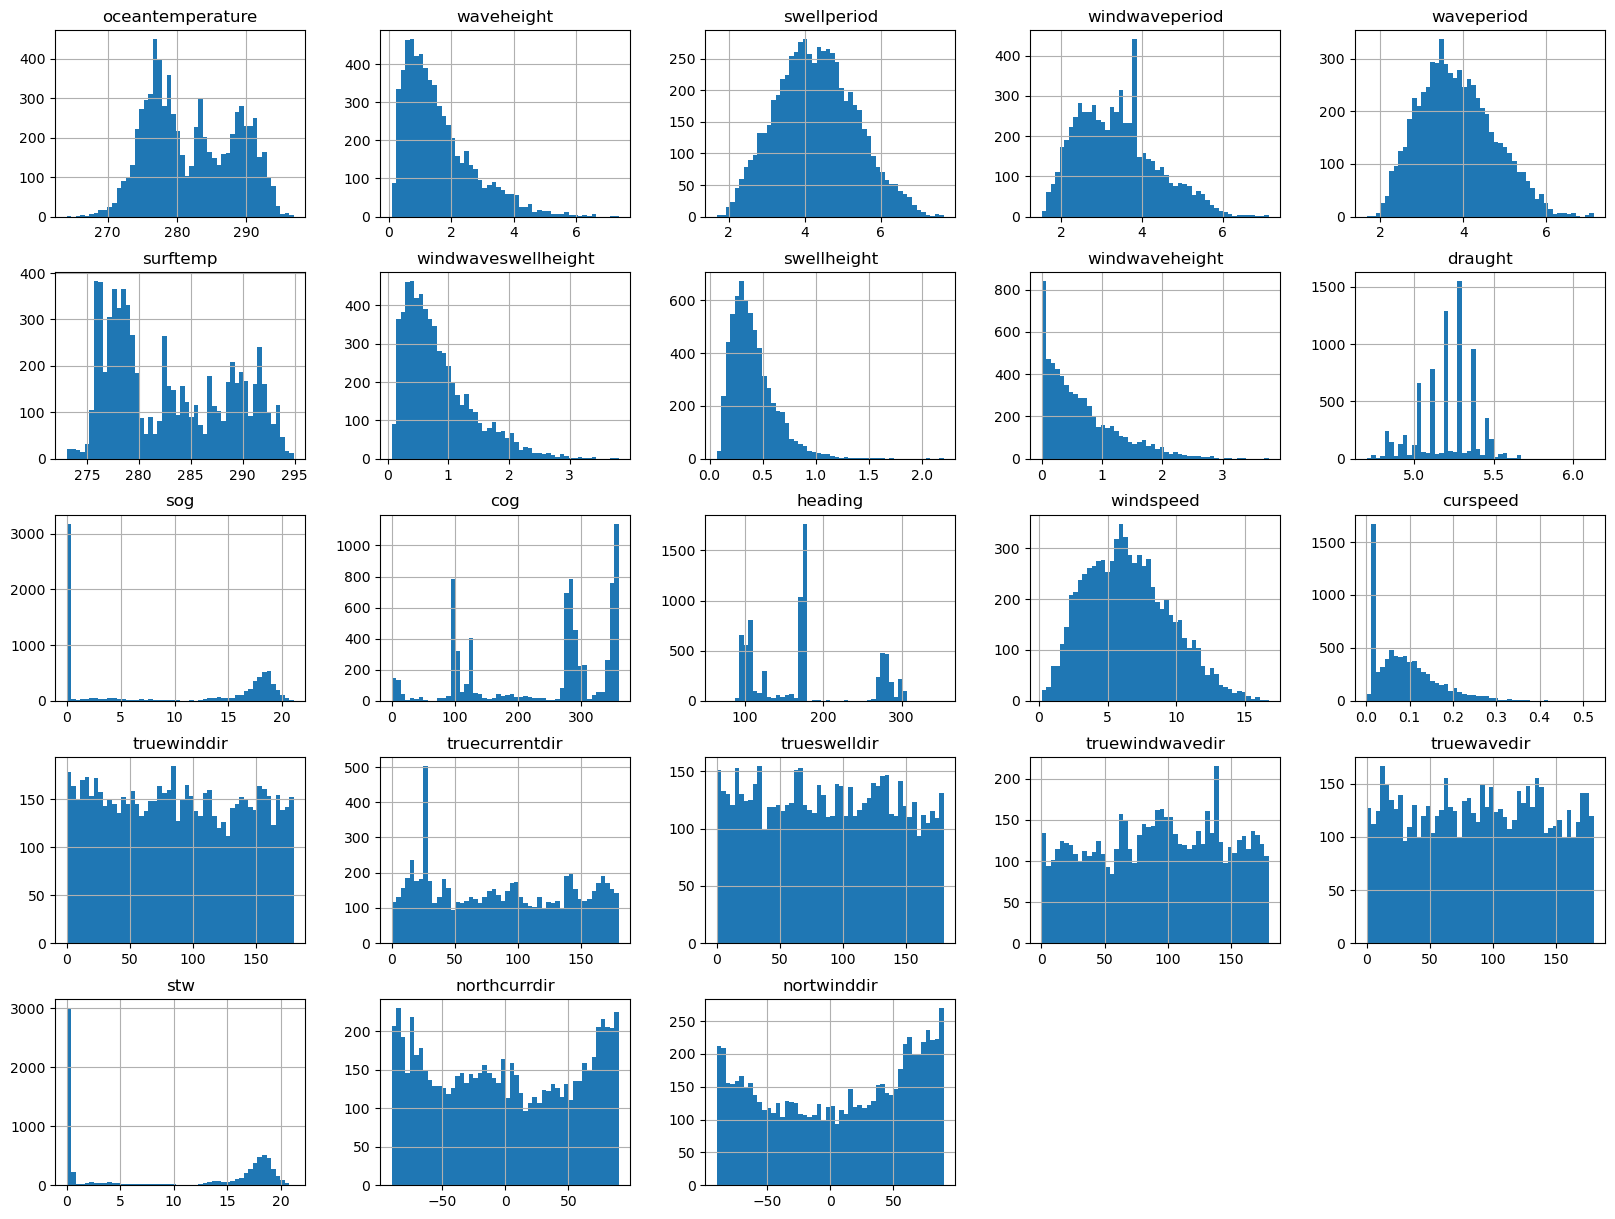

In [17]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
df_ship2.hist(bins=50,figsize=(20,15))
plt.show()

In [18]:
corr_matrix = df_ship2.corr()
print(corr_matrix["sog"])

oceantemperature       0.088598
waveheight            -0.157069
swellperiod           -0.211793
windwaveperiod        -0.109080
waveperiod            -0.210662
surftemp               0.080481
windwaveswellheight   -0.154708
swellheight           -0.265872
windwaveheight        -0.108153
draught                0.130693
sog                    1.000000
cog                   -0.422707
heading                0.226838
windspeed             -0.019330
curspeed              -0.020295
truewinddir            0.011425
truecurrentdir         0.083648
trueswelldir           0.012316
truewindwavedir       -0.036343
truewavedir            0.012555
stw                    0.999814
northcurrdir          -0.012361
nortwinddir           -0.029499
Name: sog, dtype: float64


In [19]:
df_ship2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7995
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oceantemperature     7453 non-null   float64
 1   waveheight           6274 non-null   float64
 2   swellperiod          6274 non-null   float64
 3   windwaveperiod       6274 non-null   float64
 4   waveperiod           6274 non-null   float64
 5   surftemp             7318 non-null   float64
 6   windwaveswellheight  6274 non-null   float64
 7   swellheight          6274 non-null   float64
 8   windwaveheight       6274 non-null   float64
 9   draught              7453 non-null   float64
 10  sog                  7453 non-null   float64
 11  cog                  7453 non-null   float64
 12  heading              7453 non-null   float64
 13  windspeed            7453 non-null   float64
 14  curspeed             7453 non-null   float64
 15  truewinddir          7453 non-null   f

In [20]:
dfship_corr = df_ship2.drop(df_ship2.columns[[0,5,9,15,16,17,18,19,21,22]],axis=1)
dfship_corr.head()

,waveheight,swellperiod,windwaveperiod,waveperiod,windwaveswellheight,swellheight,windwaveheight,sog,cog,heading,windspeed,curspeed,stw
0,1.893614,4.818881,3.818459,4.154329,0.985695,0.566879,0.805267,0.0,358.9,174.0,7.112664,0.122270,0.237667
1,1.752303,4.755800,3.470216,4.130580,0.916525,0.653061,0.641006,0.0,358.9,174.0,6.653538,0.122270,0.237667
2,1.619775,4.645083,3.259682,4.083755,0.851447,0.650009,0.545059,0.0,358.9,174.0,6.488697,0.099846,0.194082
3,1.518736,4.588384,3.177906,4.010502,0.799149,0.604842,0.515686,0.0,358.9,174.0,6.104632,0.099846,0.194082
4,1.455034,4.528841,3.281654,3.913362,0.767285,0.522369,0.549881,0.0,358.9,174.0,6.181707,0.099846,0.194082


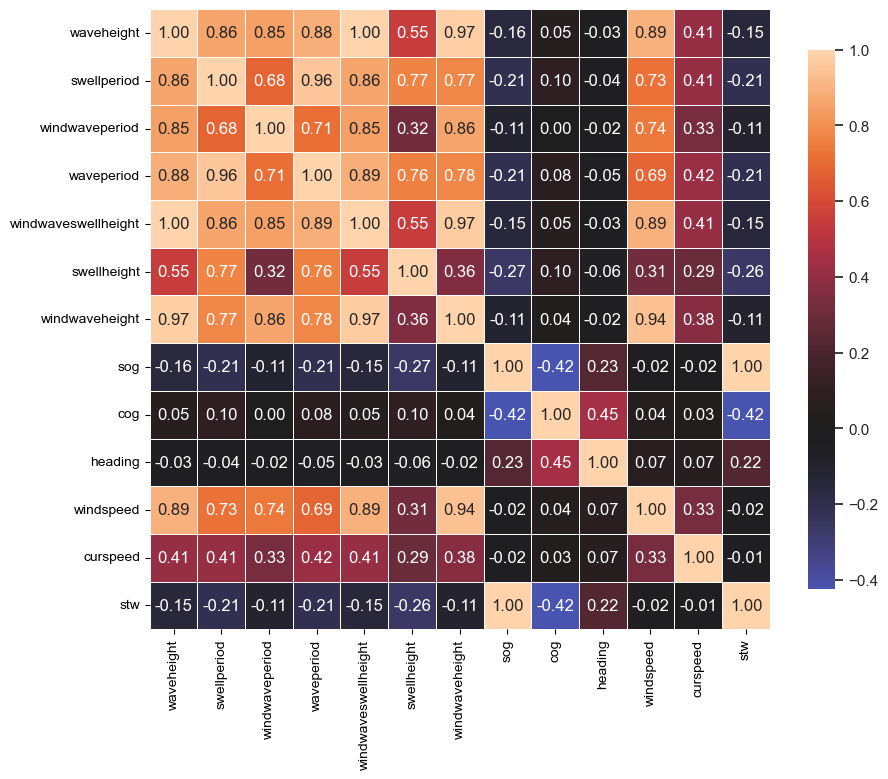

In [21]:
def correlation_heatmap(df,fontsize):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.set(font_scale = fontsize)
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(dfship_corr,1)

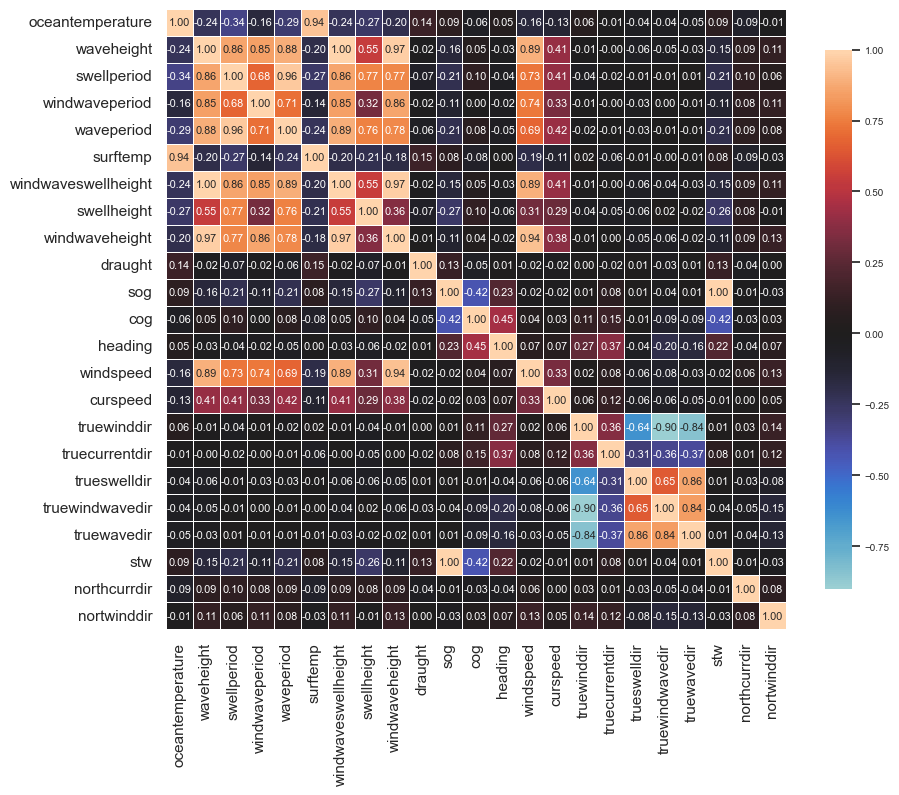

In [22]:
correlation_heatmap(df_ship2,0.65)

In [23]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(df_ship2)

KNNImputer()

In [24]:
X = imputer.transform(df_ship2)

In [25]:
df_ship2tr = pd.DataFrame(X, columns=df_ship2.columns, index=df_ship2.index)

In [26]:
df_ship2tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7995
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oceantemperature     7453 non-null   float64
 1   waveheight           7453 non-null   float64
 2   swellperiod          7453 non-null   float64
 3   windwaveperiod       7453 non-null   float64
 4   waveperiod           7453 non-null   float64
 5   surftemp             7453 non-null   float64
 6   windwaveswellheight  7453 non-null   float64
 7   swellheight          7453 non-null   float64
 8   windwaveheight       7453 non-null   float64
 9   draught              7453 non-null   float64
 10  sog                  7453 non-null   float64
 11  cog                  7453 non-null   float64
 12  heading              7453 non-null   float64
 13  windspeed            7453 non-null   float64
 14  curspeed             7453 non-null   float64
 15  truewinddir          7453 non-null   f

In [27]:
# Implement the Random forest, but first, data is to be split into training and validation data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_ship2tr.drop(['sog','stw'],axis=1),df_ship2tr.sog,test_size=0.2,random_state=42)


In [28]:
x_train

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,heading,windspeed,curspeed,truewinddir,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,northcurrdir,nortwinddir
7849,273.689453,1.903392,5.168277,3.889747,4.129031,278.249023,0.989900,0.419144,0.894226,4.998273,...,173.378172,8.377506,0.077309,52.717592,111.013014,172.903383,128.638033,134.130404,62.365158,-59.339420
446,276.927002,0.735258,3.607073,1.954018,3.369207,277.552124,0.398392,0.342560,0.162720,5.199557,...,124.934560,4.326051,0.070420,125.368141,121.313346,59.294994,57.766124,63.021755,3.621213,-0.433582
763,273.599243,1.818458,4.729419,2.375954,4.557055,277.389282,0.956662,0.916744,0.249573,5.110976,...,174.612903,4.602489,0.064624,130.192840,57.165581,19.955646,52.156170,15.603458,-62.552678,44.420063
2764,278.710449,0.721055,4.557714,2.532387,4.019384,278.912353,0.386143,0.333221,0.168640,5.292658,...,174.000000,4.371434,0.150352,97.937795,99.796772,109.081398,90.140121,102.801010,-86.203228,-88.062205
5033,288.929688,4.489095,5.438617,5.381607,5.382501,291.060547,2.365670,0.290192,2.347656,5.378323,...,94.551523,13.561472,0.016704,0.269007,13.555761,142.799154,176.290762,176.103018,69.803252,-85.717484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,290.820557,0.373232,2.555482,2.812599,2.446046,290.348267,0.212761,0.192871,0.069901,5.380923,...,100.545195,2.429712,0.011765,16.668276,55.550098,114.151476,151.207109,116.679186,44.995096,83.876918
5572,288.931152,1.997423,4.862336,3.859645,4.204206,290.358154,1.042727,0.453425,0.903073,5.291434,...,149.342624,5.400804,0.016704,75.284391,68.346862,115.442707,98.762488,101.550959,-78.700884,74.058233
5761,285.710449,1.085777,5.123824,2.513113,4.283919,288.593994,0.577680,0.455246,0.336029,5.286295,...,174.000000,5.957770,0.158087,59.134771,114.202550,122.145428,123.006043,158.881568,-71.797450,-65.134771
876,272.841065,5.619343,6.726208,6.288489,6.357797,276.691162,2.965053,0.590149,2.880615,5.110293,...,94.400034,15.077783,0.300923,168.875043,159.437190,17.706525,11.097636,10.211573,-65.037156,83.275077


In [29]:
y_train

7849     0.217572
446     16.780417
763      0.000000
2764     0.000000
5033    19.618552
          ...    
5533    19.327174
5572     3.143668
5761     0.000000
876     17.887736
7805    17.138849
Name: sog, Length: 5962, dtype: float64

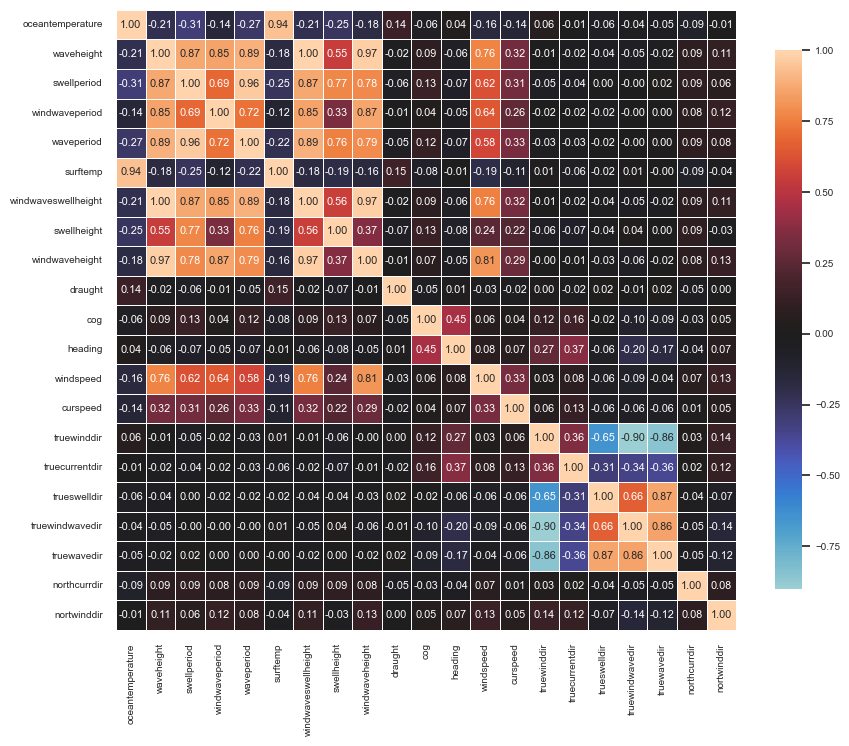

In [30]:
correlation_heatmap(x_train,0.65)

In [31]:
len(x_train)


5962

In [32]:
len(x_test)

1491

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
from sklearn import tree

fn=x_train.columns

#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
#tree.plot_tree(model.estimators_[0],
#               fontsize=5,
#               max_depth=3,
#               feature_names = fn, 
#               filled = True);
fig, axes = plt.subplots(figsize = (25,5), dpi=800)
#figsize(width,height)
#plt.figure(figsize=(18,4.8))
tree.plot_tree(model.estimators_[0],
               max_depth=3,
               fontsize=8,
               feature_names = fn);
plt.show()

#fig.savefig('rf_individualtree.png')

In [35]:
mod_imp = model.feature_importances_
df_mod_imp = pd.DataFrame(mod_imp,index= x_train.columns,columns=["Importance"])
print(df_mod_imp)

                     Importance
oceantemperature       0.000406
waveheight             0.000224
swellperiod            0.000280
windwaveperiod         0.000393
waveperiod             0.000289
surftemp               0.000391
windwaveswellheight    0.000187
swellheight            0.001289
windwaveheight         0.000218
draught                0.001898
cog                    0.868592
heading                0.122520
windspeed              0.000295
curspeed               0.000441
truewinddir            0.000246
truecurrentdir         0.000570
trueswelldir           0.000284
truewindwavedir        0.000249
truewavedir            0.000203
northcurrdir           0.000599
nortwinddir            0.000427


In [36]:
#from sklearn.feature_selection import RFECV
#selector = RFECV(estimator=RandomForestRegressor(), min_features_to_select=15)
#selector.fit(x_train,y_train)

#dfrank = pd.DataFrame(selector.support_,index=x_train.columns,columns=["Include"])
#dfrank["Rank"] = pd.DataFrame(selector.ranking_,index=x_train.columns)
#print(dfrank)

# This is already functioning 
#from sklearn.feature_selection import RFE
#rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=15)
#rfe.fit(x_train,y_train)

#dfrank = pd.DataFrame(rfe.support_,index=x_train.columns,columns=["Include"])
#dfrank["Rank"] = pd.DataFrame(rfe.ranking_,index=x_train.columns)
#print(dfrank)

#for i in range(x_train.shape[1]):
# print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [37]:
model.score(x_test,y_test)
# r^2 score

0.9881560175217803

In [38]:
y_predicted = model.predict(x_test)

In [39]:
# Application for evaluation metrics, starting with explained variance

from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,y_predicted)
# Best value is 1 

0.9881564709430171

In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predicted)
# Best value is 0

0.393724368219611

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predicted)
# Best value is 0

0.8796522096509902

In [42]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test,y_predicted)
# Best value is 0

0.09095394389999001

Parameter optimization using GridSearchCV

In [43]:
#from sklearn.model_selection import GridSearchCV

#param_grid = [
#    {'n_estimators': [1,100,200], 'min_samples_split': [2,10,20]},
#  ]

#forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
#grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                           scoring='neg_mean_squared_error',
#                           return_train_score=True)
#grid_search.fit(x_train, y_train)

In [44]:
#grid_search.best_params_

In [45]:
#grid_search.best_estimator_

In [46]:
#y_pred_grid = grid_search.predict(x_test)

In [47]:
# Application for evaluation metrics, starting with explained variance

#from sklearn.metrics import explained_variance_score
#explained_variance_score(y_test,y_pred_grid)
# Best value is 1 

In [48]:
#from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_test,y_pred_grid)
# Best value is 0

In [49]:
#from sklearn.metrics import mean_squared_error
#mean_squared_error(y_test,y_pred_grid)
# Best value is 0

In [50]:
#from sklearn.metrics import median_absolute_error
#median_absolute_error(y_test,y_pred_grid)
# Best value is 0

Forecasting for June 2021

In [78]:
df.head()

,Unnamed: 0,Time,LON,LAT,Temperature above oceans,Air density above oceans,Max wave height,Swell period,Wind wave period,Wave period,...,SOG,COG,Heading,Wind Speed,Current Speed,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction
0,0,01/01/2021 00:00,14.689663,55.098452,277.311035,1.259323,1.893614,4.818881,3.818459,4.154329,...,0.0,358.9,174.0,7.112664,0.122270,155.408180,105.591753,22.854050,22.749664,22.610062
1,1,01/01/2021 01:00,14.689659,55.098451,277.328369,1.259985,1.752303,4.755800,3.470216,4.130580,...,0.0,358.9,174.0,6.653538,0.122270,158.458891,105.591753,26.122772,19.152008,22.209274
2,2,01/01/2021 02:00,14.689648,55.098468,277.390625,1.260244,1.619775,4.645083,3.259682,4.083755,...,0.0,358.9,174.0,6.488697,0.099846,163.749663,116.740448,28.498383,12.424912,20.857971
3,3,01/01/2021 03:00,14.689646,55.098471,277.411377,1.260148,1.518736,4.588384,3.177906,4.010502,...,0.0,358.9,174.0,6.104632,0.099846,170.724504,116.740448,29.956985,6.725922,18.732071
4,4,01/01/2021 04:00,14.689644,55.098462,277.430664,1.260634,1.455034,4.528841,3.281654,3.913362,...,0.0,358.9,174.0,6.181707,0.099846,179.505940,116.740448,34.486298,3.761627,15.731430


In [79]:
dfdate = pd.read_csv("AIS_weather_H_ok2_copy.csv",parse_dates=["Time"])
dfdate = dfdate[dfdate['LAT'] > 55.04 ]

In [80]:
dfdate.head()

,Unnamed: 0,Time,LON,LAT,Temperature above oceans,Air density above oceans,Max wave height,Swell period,Wind wave period,Wave period,...,SOG,COG,Heading,Wind Speed,Current Speed,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction
0,0,2021-01-01 00:00:00,14.689663,55.098452,277.311035,1.259323,1.893614,4.818881,3.818459,4.154329,...,0.0,358.9,174.0,7.112664,0.122270,155.408180,105.591753,22.854050,22.749664,22.610062
1,1,2021-01-01 01:00:00,14.689659,55.098451,277.328369,1.259985,1.752303,4.755800,3.470216,4.130580,...,0.0,358.9,174.0,6.653538,0.122270,158.458891,105.591753,26.122772,19.152008,22.209274
2,2,2021-01-01 02:00:00,14.689648,55.098468,277.390625,1.260244,1.619775,4.645083,3.259682,4.083755,...,0.0,358.9,174.0,6.488697,0.099846,163.749663,116.740448,28.498383,12.424912,20.857971
3,3,2021-01-01 03:00:00,14.689646,55.098471,277.411377,1.260148,1.518736,4.588384,3.177906,4.010502,...,0.0,358.9,174.0,6.104632,0.099846,170.724504,116.740448,29.956985,6.725922,18.732071
4,4,2021-01-01 04:00:00,14.689644,55.098462,277.430664,1.260634,1.455034,4.528841,3.281654,3.913362,...,0.0,358.9,174.0,6.181707,0.099846,179.505940,116.740448,34.486298,3.761627,15.731430


In [81]:
dfdate["stw"] = dfship_pre["stw"]
dfdate["northcurrdir"] = dfship_pre["curdir"]
dfdate["nortwinddir"] = dfship_pre["winddir"]

dfdate.head(n=10)

,Unnamed: 0,Time,LON,LAT,Temperature above oceans,Air density above oceans,Max wave height,Swell period,Wind wave period,Wave period,...,Wind Speed,Current Speed,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction,stw,northcurrdir,nortwinddir
0,0,2021-01-01 00:00:00,14.689663,55.098452,277.311035,1.259323,1.893614,4.818881,3.818459,4.154329,...,7.112664,0.122270,155.408180,105.591753,22.854050,22.749664,22.610062,0.237667,68.408246,18.591820
1,1,2021-01-01 01:00:00,14.689659,55.098451,277.328369,1.259985,1.752303,4.755800,3.470216,4.130580,...,6.653538,0.122270,158.458891,105.591753,26.122772,19.152008,22.209274,0.237667,68.408246,15.541109
2,2,2021-01-01 02:00:00,14.689648,55.098468,277.390625,1.260244,1.619775,4.645083,3.259682,4.083755,...,6.488697,0.099846,163.749663,116.740448,28.498383,12.424912,20.857971,0.194082,57.259552,10.250337
3,3,2021-01-01 03:00:00,14.689646,55.098471,277.411377,1.260148,1.518736,4.588384,3.177906,4.010502,...,6.104632,0.099846,170.724504,116.740448,29.956985,6.725922,18.732071,0.194082,57.259552,3.275496
4,4,2021-01-01 04:00:00,14.689644,55.098462,277.430664,1.260634,1.455034,4.528841,3.281654,3.913362,...,6.181707,0.099846,179.505940,116.740448,34.486298,3.761627,15.731430,0.194082,57.259552,-5.505940
5,5,2021-01-01 05:00:00,14.689649,55.098455,277.389648,1.260749,1.449675,4.456523,3.420509,3.809428,...,7.010625,0.110275,176.640877,147.928357,42.184875,1.198700,11.748291,0.214353,26.071643,-9.359123
6,6,2021-01-01 06:00:00,14.689636,55.098470,277.320557,1.261436,1.518332,4.351818,3.521645,3.737560,...,7.710115,0.110275,176.708409,147.928357,46.624313,0.294296,7.536240,0.214353,26.071643,-9.291591
7,7,2021-01-01 07:00:00,14.689641,55.098466,277.155518,1.261738,1.623140,4.303657,3.603798,3.731513,...,8.037884,0.110275,179.497847,147.928357,38.309525,0.913208,4.786667,0.214353,26.071643,-6.502153
8,8,2021-01-01 08:00:00,14.559275,55.121629,276.900391,1.261916,1.661038,4.291309,3.667458,3.757862,...,7.648595,0.104064,91.133175,143.029898,82.454986,91.138748,90.495209,14.659766,52.930471,1.033749
9,9,2021-01-01 09:00:00,14.150896,55.261799,276.705566,1.262235,1.501637,4.187211,3.145607,3.803910,...,6.700397,0.104050,68.884377,96.351303,134.548587,115.015200,120.971331,18.164654,36.481737,9.014812


In [82]:
dfdate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7995
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Unnamed: 0                            7453 non-null   int64         
 1   Time                                  7453 non-null   datetime64[ns]
 2   LON                                   7453 non-null   float64       
 3   LAT                                   7453 non-null   float64       
 4   Temperature above oceans              7453 non-null   float64       
 5   Air density above oceans              7337 non-null   float64       
 6   Max wave height                       6274 non-null   float64       
 7   Swell period                          6274 non-null   float64       
 8   Wind wave period                      6274 non-null   float64       
 9   Wave period                           6274 non-null   float64       
 10  

In [83]:
# Filter Rows by Dates in pandas DataFrame
dfdate2 = dfdate[(dfdate['Time'] > "2021-05-31") & (dfdate['Time']< "2021-07-01")]
print(dfdate2)
#dfdate2.to_csv("June_AIS_H_ok2.csv")


      Unnamed: 0                Time        LON        LAT  \
119          119 2021-06-01 00:00:00  12.963169  55.245259   
120          120 2021-06-01 01:00:00  13.553184  55.190532   
121          121 2021-06-01 02:00:00  14.073991  55.143902   
122          122 2021-06-01 03:00:00  14.564450  55.096648   
123          123 2021-06-01 04:00:00  14.689651  55.098452   
...          ...                 ...        ...        ...   
7415        7415 2021-06-12 19:00:00  12.462626  55.399230   
7416        7416 2021-06-12 20:00:00  12.204991  55.456366   
7417        7417 2021-06-12 21:00:00  12.196962  55.455570   
7418        7418 2021-06-12 22:00:00  12.262350  55.448184   
7419        7419 2021-06-12 23:00:00  12.590485  55.331675   

      Temperature above oceans  Air density above oceans  Max wave height  \
119                 275.823975                  1.283481         3.358080   
120                 275.924011                  1.283425         3.578120   
121                 276.

In [84]:
dfchk6_sog= dfdate2[dfdate2["SOG"] > dfdate2["stw"] ]
dfchk6_stw= dfdate2[dfdate2["stw"] > dfdate2["SOG"] ]
#dfchk6_sog.to_csv("June_AIS_H_ok2sog.csv")
#dfchk6_stw.to_csv("June_AIS_H_ok2stw.csv")
print(dfchk6_sog.info())
print(dfchk6_stw.info())

dfdate2 = dfdate2.drop(['Unnamed: 0','Time','LON','LAT','Air density above oceans',
'Surface pressure','Width','Length'],axis=1)
dfdate2.head(n=5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 119 to 7416
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Unnamed: 0                            188 non-null    int64         
 1   Time                                  188 non-null    datetime64[ns]
 2   LON                                   188 non-null    float64       
 3   LAT                                   188 non-null    float64       
 4   Temperature above oceans              188 non-null    float64       
 5   Air density above oceans              176 non-null    float64       
 6   Max wave height                       153 non-null    float64       
 7   Swell period                          153 non-null    float64       
 8   Wind wave period                      153 non-null    float64       
 9   Wave period                           153 non-null    float64       
 10 

,Temperature above oceans,Max wave height,Swell period,Wind wave period,Wave period,Sea surface temperature,Combined wind waves and swell height,Swell height,Wind wave height,Draught,...,Wind Speed,Current Speed,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction,stw,northcurrdir,nortwinddir
119,275.823975,3.358080,6.738089,4.925452,5.291555,278.661621,1.759765,0.743164,1.583740,5.281861,...,10.248966,0.144914,100.989288,164.871808,15.554049,66.843493,57.268527,18.729972,85.654121,21.771601
120,275.924011,3.578120,7.185143,5.342444,5.697814,278.936035,1.950242,0.841925,1.757568,5.289403,...,11.364678,0.246220,108.737155,153.650411,11.071672,60.455881,51.313932,18.913459,70.585227,25.671971
121,276.285034,4.184914,7.260825,5.460486,6.126474,279.209961,2.189788,0.933936,1.910706,5.288446,...,12.666946,0.284315,114.910729,153.031589,16.281358,57.086511,46.894106,18.429833,70.557348,32.436488
122,277.189484,4.908680,6.808745,6.225745,6.284671,279.216553,2.565230,0.723303,2.452637,5.290781,...,13.386999,0.300428,123.568984,153.643227,69.175152,55.507286,56.527939,13.276732,80.584748,50.510505
123,277.396118,4.986748,6.815893,6.302772,6.418481,279.319824,2.601852,0.856281,2.433167,5.013024,...,13.105545,0.300428,66.872260,86.851414,145.135853,115.342209,118.364872,0.583972,80.584748,60.605594


In [85]:
dfdate2 = dfdate2.rename({'Max wave height': 'waveheight', 'Draught': 'draught',
                           'SOG': 'sog', 'Wind Speed': 'windspeed', 
                           'True Wind Direction': 'truewinddir','Temperature above oceans' : 'oceantemperature',
                           'COG': 'cog', 'Current Speed' : 'curspeed','True Wave Direction' : 'truewavedir',
                            'Swell period': 'swellperiod','Wind wave period': 'windwaveperiod','Sea surface temperature': 'surftemp',
                            'Combined wind waves and swell height': 'windwaveswellheight','Swell height': 'swellheight','Wind wave height': 'windwaveheight',
                            'Heading': 'heading','True Current Direction': 'truecurrentdir','True Swell Direction': 'trueswelldir',
                            'True Wind Wave Direction': 'truewindwavedir','Wave period': 'waveperiod'
                           }, axis=1) 

In [86]:
imputer.fit(dfdate2)

KNNImputer()

In [87]:
xdate = imputer.transform(dfdate2)

In [88]:
dfdate2tr = pd.DataFrame(xdate, columns=dfdate2.columns, index=dfdate2.index)

In [89]:
dfdate2tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 119 to 7419
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oceantemperature     639 non-null    float64
 1   waveheight           639 non-null    float64
 2   swellperiod          639 non-null    float64
 3   windwaveperiod       639 non-null    float64
 4   waveperiod           639 non-null    float64
 5   surftemp             639 non-null    float64
 6   windwaveswellheight  639 non-null    float64
 7   swellheight          639 non-null    float64
 8   windwaveheight       639 non-null    float64
 9   draught              639 non-null    float64
 10  sog                  639 non-null    float64
 11  cog                  639 non-null    float64
 12  heading              639 non-null    float64
 13  windspeed            639 non-null    float64
 14  curspeed             639 non-null    float64
 15  truewinddir          639 non-null    

In [90]:
x_date = dfdate2tr.drop(['sog','stw'],axis=1)
y_date = dfdate2tr.sog
x_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 119 to 7419
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oceantemperature     639 non-null    float64
 1   waveheight           639 non-null    float64
 2   swellperiod          639 non-null    float64
 3   windwaveperiod       639 non-null    float64
 4   waveperiod           639 non-null    float64
 5   surftemp             639 non-null    float64
 6   windwaveswellheight  639 non-null    float64
 7   swellheight          639 non-null    float64
 8   windwaveheight       639 non-null    float64
 9   draught              639 non-null    float64
 10  cog                  639 non-null    float64
 11  heading              639 non-null    float64
 12  windspeed            639 non-null    float64
 13  curspeed             639 non-null    float64
 14  truewinddir          639 non-null    float64
 15  truecurrentdir       639 non-null    

In [91]:
model.fit(x_date,y_date)

RandomForestRegressor()

In [92]:
model.score(x_date,y_date)

0.9980873633716482

In [93]:
ydate_pred = model.predict(x_date)

In [94]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_date,ydate_pred)

0.9980878740228556

In [95]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_date,ydate_pred)

0.185598648647214

In [96]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_date,ydate_pred)

0.15053566322854872

In [97]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_date,ydate_pred)

0.06415941460002017

In [98]:
dfprog_sog = pd.Series(y_date,name="sog_act").to_frame()
dfprog_sog["sog_pred"] = ydate_pred
print(dfprog_sog)

        sog_act   sog_pred
119   18.998906  19.083259
120   19.334278  19.291334
121   18.911047  18.922640
122   13.854933  12.872288
123    0.000000   0.194336
...         ...        ...
7415  15.963630  16.732221
7416   3.085459   3.402342
7417   0.000000   0.335018
7418   8.988086   9.147195
7419  17.672769  17.549356

[639 rows x 2 columns]


In [100]:
dfprog = pd.concat([x_date,dfprog_sog],axis=1)
dfprog.head(n=10)

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,curspeed,truewinddir,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,northcurrdir,nortwinddir,sog_act,sog_pred
119,275.823975,3.358080,6.738089,4.925452,5.291555,278.661621,1.759765,0.743164,1.583740,5.281861,...,0.144914,100.989288,164.871808,15.554049,66.843493,57.268527,85.654121,21.771601,18.998906,19.083259
120,275.924011,3.578120,7.185143,5.342444,5.697814,278.936035,1.950242,0.841925,1.757568,5.289403,...,0.246220,108.737155,153.650411,11.071672,60.455881,51.313932,70.585227,25.671971,19.334278,19.291334
121,276.285034,4.184914,7.260825,5.460486,6.126474,279.209961,2.189788,0.933936,1.910706,5.288446,...,0.284315,114.910729,153.031589,16.281358,57.086511,46.894106,70.557348,32.436488,18.911047,18.922640
122,277.189484,4.908680,6.808745,6.225745,6.284671,279.216553,2.565230,0.723303,2.452637,5.290781,...,0.300428,123.568984,153.643227,69.175152,55.507286,56.527939,80.584748,50.510505,13.854933,12.872288
123,277.396118,4.986748,6.815893,6.302772,6.418481,279.319824,2.601852,0.856281,2.433167,5.013024,...,0.300428,66.872260,86.851414,145.135853,115.342209,118.364872,80.584748,60.605594,0.000000,0.194336
124,277.655945,4.882606,6.781960,6.225257,6.385939,279.319824,2.548358,0.877191,2.355652,4.920497,...,0.262897,69.199755,95.792423,142.136679,112.624105,116.557745,89.447596,62.854928,0.000000,0.008235
125,277.667755,4.786871,6.696195,6.121009,6.340137,279.319824,2.495529,0.906226,2.275208,4.933332,...,0.262897,72.772267,95.447596,145.841980,109.999123,115.341347,89.447596,66.772267,0.000000,0.008235
126,277.408752,4.621826,6.813305,5.970984,6.291378,279.319824,2.414834,1.022894,2.130981,4.842367,...,0.262897,26.476633,41.766758,158.632374,159.050718,167.192888,89.447596,74.157471,9.305198,9.731524
127,277.399658,3.852527,6.907508,5.299354,6.061778,279.230591,2.021695,1.143225,1.607422,4.841530,...,0.181460,49.650197,36.203894,98.603207,126.285782,119.939682,85.735437,72.289134,20.935741,19.423841
128,275.499359,3.304548,6.816074,4.561194,5.927387,284.331543,1.754722,1.136414,1.240662,4.852890,...,0.281402,11.124505,16.745666,170.252415,173.337517,176.253205,87.870444,60.000273,12.419853,12.628281


In [101]:
dfprog["vgms"] = dfprog["sog_pred"]/1.9438

In [102]:
dfprog["vgx"] = dfprog["vgms"] * np.sin(np.deg2rad(dfprog["cog"]))
dfprog["vcx"] = dfprog["curspeed"] * np.sin(np.deg2rad(dfprog["northcurrdir"]))
dfprog["stw_x"] = (dfprog["vgx"] - dfprog["vcx"])

In [103]:
dfprog["vgy"] = dfprog["vgms"] * np.cos(np.deg2rad(dfprog["cog"]))
dfprog["vcy"] = dfprog["curspeed"] * np.cos(np.deg2rad(dfprog["northcurrdir"]))
dfprog["stw_y"] = (dfprog["vgy"] - dfprog["vcy"])

In [104]:
dfprog["vwms_p"] = np.sqrt(dfprog["stw_x"]**2 + dfprog["stw_y"]**2)
dfprog["stw_pred"] = dfprog["vwms_p"]*1.9438
dfprog = dfprog.drop(['vgms','vgx','vcx','stw_x',
                      'vgy','vcy','stw_y',
                      'vwms_p'],axis=1)
#df_ship.head(n=5)
dfprog.head(n=10)

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,truewinddir,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,northcurrdir,nortwinddir,sog_act,sog_pred,stw_pred
119,275.823975,3.358080,6.738089,4.925452,5.291555,278.661621,1.759765,0.743164,1.583740,5.281861,...,100.989288,164.871808,15.554049,66.843493,57.268527,85.654121,21.771601,18.998906,19.083259,18.814325
120,275.924011,3.578120,7.185143,5.342444,5.697814,278.936035,1.950242,0.841925,1.757568,5.289403,...,108.737155,153.650411,11.071672,60.455881,51.313932,70.585227,25.671971,19.334278,19.291334,18.870517
121,276.285034,4.184914,7.260825,5.460486,6.126474,279.209961,2.189788,0.933936,1.910706,5.288446,...,114.910729,153.031589,16.281358,57.086511,46.894106,70.557348,32.436488,18.911047,18.922640,18.441425
122,277.189484,4.908680,6.808745,6.225745,6.284671,279.216553,2.565230,0.723303,2.452637,5.290781,...,123.568984,153.643227,69.175152,55.507286,56.527939,80.584748,50.510505,13.854933,12.872288,12.294107
123,277.396118,4.986748,6.815893,6.302772,6.418481,279.319824,2.601852,0.856281,2.433167,5.013024,...,66.872260,86.851414,145.135853,115.342209,118.364872,80.584748,60.605594,0.000000,0.194336,0.579156
124,277.655945,4.882606,6.781960,6.225257,6.385939,279.319824,2.548358,0.877191,2.355652,4.920497,...,69.199755,95.792423,142.136679,112.624105,116.557745,89.447596,62.854928,0.000000,0.008235,0.510776
125,277.667755,4.786871,6.696195,6.121009,6.340137,279.319824,2.495529,0.906226,2.275208,4.933332,...,72.772267,95.447596,145.841980,109.999123,115.341347,89.447596,66.772267,0.000000,0.008235,0.510776
126,277.408752,4.621826,6.813305,5.970984,6.291378,279.319824,2.414834,1.022894,2.130981,4.842367,...,26.476633,41.766758,158.632374,159.050718,167.192888,89.447596,74.157471,9.305198,9.731524,9.435676
127,277.399658,3.852527,6.907508,5.299354,6.061778,279.230591,2.021695,1.143225,1.607422,4.841530,...,49.650197,36.203894,98.603207,126.285782,119.939682,85.735437,72.289134,20.935741,19.423841,19.709460
128,275.499359,3.304548,6.816074,4.561194,5.927387,284.331543,1.754722,1.136414,1.240662,4.852890,...,11.124505,16.745666,170.252415,173.337517,176.253205,87.870444,60.000273,12.419853,12.628281,12.962152
